## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_mouse_df["Mouse ID"].count()

1893

In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = merged_mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [4]:
# Checking the number of mice in the clean DataFrame.
unique_df["Mouse ID"].count()

1888

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_df = unique_df.groupby("Drug Regimen")

tumor_mean = grouped_df["Tumor Volume (mm3)"].mean()
tumor_median = grouped_df["Tumor Volume (mm3)"].median()
tumor_variance = grouped_df["Tumor Volume (mm3)"].var()
tumor_std = grouped_df["Tumor Volume (mm3)"].std()
tumor_sem = grouped_df["Tumor Volume (mm3)"].sem()

summary_tumor_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median, 
                                 "Variance": tumor_variance,
                                 "Standard Deviation": tumor_std,
                                 "SEM": tumor_sem})
summary_tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

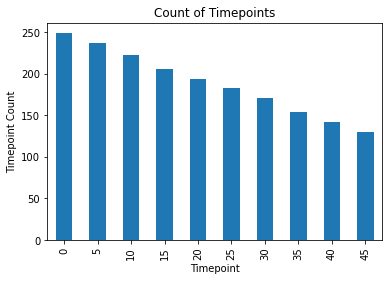

In [6]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
unique_df["Timepoint"].value_counts().plot(kind="bar")
plt.xlabel("Timepoint")
plt.ylabel("Timepoint Count")
plt.title("Count of Timepoints")
plt.show()

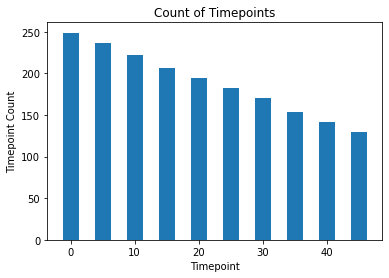

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_values = unique_df["Timepoint"].unique()
y_values = unique_df["Timepoint"].value_counts()
plt.bar(x_values, y_values, width=2.5)
plt.xlabel("Timepoint")
plt.ylabel("Timepoint Count")
plt.title("Count of Timepoints")
plt.show()

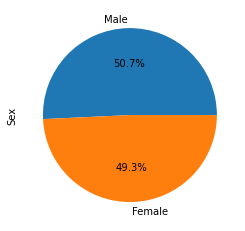

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

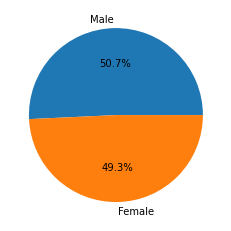

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = unique_df["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_df = unique_df.loc[(unique_df["Drug Regimen"] == "Capomulin") | (unique_df["Drug Regimen"] == "Ramicane") | (unique_df["Drug Regimen"] == "Infubinol") | (unique_df["Drug Regimen"] == "Ceftamin")]
final_tumor_df.head()

# Start by getting the last (greatest) timepoint for each mouse
group_df = final_tumor_df.groupby("Mouse ID")["Timepoint"].max()
timepoint_df = pd.DataFrame({"Last Timepoint": group_df})
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(merged_mouse_df, timepoint_df, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [11]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []



for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    max_timepoint = drug_df.loc[drug_df["Timepoint"] == drug_df["Last Timepoint"]]
    max_tumor = max_timepoint["Tumor Volume (mm3)"]
    tumor_vol_data.append(max_tumor)
                           
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = max_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (max_tumor.loc[(max_timepoint["Tumor Volume (mm3)"] <= lower_bound) | (max_timepoint["Tumor Volume (mm3)"] >= upper_bound)]).count()
    print(f"There is {outliers_count} outlier(s) for {drug}")

There is 0 outlier(s) for Capomulin
There is 0 outlier(s) for Ramicane
There is 1 outlier(s) for Infubinol
There is 0 outlier(s) for Ceftamin


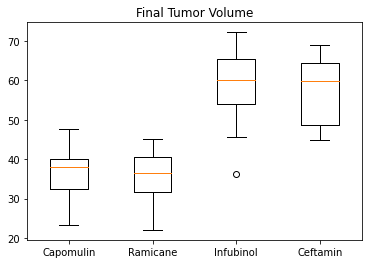

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 =plt.subplots()
ax1.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4], drugs)
plt.title("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

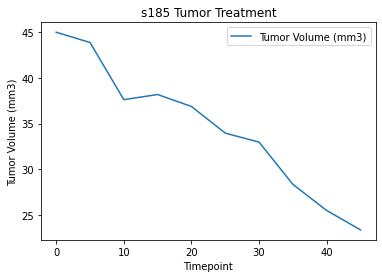

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = unique_df.loc[(unique_df["Drug Regimen"] == "Capomulin")]
unique_mouse = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]
unique_mouse.plot("Timepoint", "Tumor Volume (mm3)", kind="line")
plt.title("s185 Tumor Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

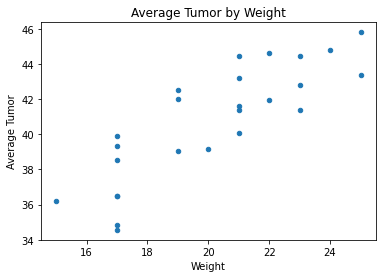

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_mouse = capomulin_df.groupby("Mouse ID")
mean_tumor = grouped_mouse["Tumor Volume (mm3)"].mean()
mean_weight = grouped_mouse["Weight (g)"].mean()
df = pd.DataFrame({"Average Tumor": mean_tumor, "Weight": mean_weight})
df.head()

df.plot("Weight", "Average Tumor", kind="scatter", title="Average Tumor by Weight")

## Correlation and Regression

The r-squared is: 0.7088568047708717


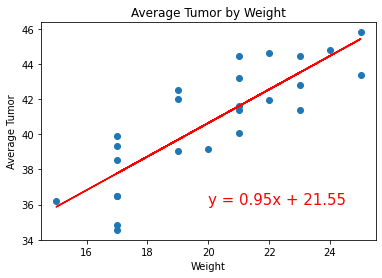

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = df["Weight"]
y_values = df["Average Tumor"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor")
plt.title("Average Tumor by Weight")
print(f"The r-squared is: {rvalue**2}")
plt.show()